In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
import datetime as dt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# pd.set_option('display.max_row', None)

In [4]:
circuits = pd.read_csv('circuits.csv')
constructor_results = pd.read_csv('constructor_results.csv')
constructors = pd.read_csv('constructors.csv')
driver_standings = pd.read_csv('driver_standings.csv')
drivers = pd.read_csv('drivers.csv')
lap_times = pd.read_csv('lap_times.csv')
pit_stops = pd.read_csv('pit_stops.csv')
qualifying = pd.read_csv('qualifying.csv')
races = pd.read_csv('races.csv')
results = pd.read_csv('results.csv')
seasons = pd.read_csv('seasons.csv')
status = pd.read_csv('status.csv')

## Data Cleaning

In [5]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25399 entries, 0 to 25398
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25399 non-null  int64  
 1   raceId           25399 non-null  int64  
 2   driverId         25399 non-null  int64  
 3   constructorId    25399 non-null  int64  
 4   number           25399 non-null  object 
 5   grid             25399 non-null  int64  
 6   position         25399 non-null  object 
 7   positionText     25399 non-null  object 
 8   positionOrder    25399 non-null  int64  
 9   points           25399 non-null  float64
 10  laps             25399 non-null  int64  
 11  time             25399 non-null  object 
 12  milliseconds     25399 non-null  object 
 13  fastestLap       25399 non-null  object 
 14  rank             25399 non-null  object 
 15  fastestLapTime   25399 non-null  object 
 16  fastestLapSpeed  25399 non-null  object 
 17  statusId    

In [6]:
# Checking str for certain column with object dtype
cols = ['number','position', 'rank']

for col in cols:
    print(col,'\n',results[col].unique(),'\n')

number 
 ['22' '3' '7' '5' '23' '8' '14' '1' '4' '12' '18' '6' '2' '9' '11' '20'
 '10' '16' '19' '15' '21' '17' '24' '25' '28' '27' '29' '30' '26' '0' '31'
 '34' '32' '33' '35' '36' '39' '38' '41' '37' '40' '42' '50' '43' '51'
 '55' '66' '44' '45' '52' '13' '77' '54' '208' '46' '48' '56' '69' '71'
 '58' '64' '62' '60' '\\N' '74' '72' '68' '70' '99' '98' '65' '73' '97'
 '76' '88' '89' '57' '53' '49' '47' '87' '61' '59' '83' '92' '95' '82'
 '81' '67' '93' '101' '102' '117' '103' '108' '119' '121' '125' '124'
 '113' '128' '135' '107' '123' '120' '126' '110' '130' '116' '136' '118'
 '114' '109' '127' '105' '112' '122' '129' '104' '115' '75' '91' '84' '90'
 '94' '78' '86' '85' '79' '63'] 

position 
 ['1' '2' '3' '4' '5' '6' '7' '8' '\\N' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '32' '33'] 

rank 
 ['2' '3' '5' '7' '1' '14' '12' '4' '9' '13' '15' '16' '6' '11' '10' '17'
 '\\N' '8' '18' '19' '20' '21' '22' '23' '24' '

In [7]:
# Replacing \\N with NaN
results = results.replace('\\N',np.NaN)
cols = ['number','position', 'rank']

# Replacing NaN with 0
for col in cols:
    results[col] = results[col].fillna(0).astype(int)

In [8]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25399 entries, 0 to 25398
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25399 non-null  int64  
 1   raceId           25399 non-null  int64  
 2   driverId         25399 non-null  int64  
 3   constructorId    25399 non-null  int64  
 4   number           25399 non-null  int32  
 5   grid             25399 non-null  int64  
 6   position         25399 non-null  int32  
 7   positionText     25399 non-null  object 
 8   positionOrder    25399 non-null  int64  
 9   points           25399 non-null  float64
 10  laps             25399 non-null  int64  
 11  time             6809 non-null   object 
 12  milliseconds     6808 non-null   object 
 13  fastestLap       6953 non-null   object 
 14  rank             25399 non-null  int32  
 15  fastestLapTime   6953 non-null   object 
 16  fastestLapSpeed  6953 non-null   object 
 17  statusId    

## Data Preparation

In this section, I filter all necessay data for 2021 Season such as season, driver, constructor, championship point, lap times, race results, etc.

In [9]:
season21 = races.loc[races['year'] == 2021].drop(['url','time'], axis = 1)
season21 = season21.sort_values(by='round')

In [10]:
results21 = pd.merge(season21['raceId'],results,how='left',on='raceId')
driver21 = pd.DataFrame(results21['driverId'].unique(),columns=['driverId'])
driver21 = pd.merge(driver21,drivers).drop('url',axis=1)

In [11]:
consturctor_results21 = pd.merge(season21['raceId'],constructor_results,how='left')
constructor21 = pd.DataFrame(consturctor_results21['constructorId'].unique(),columns=['constructorId'])
constructor21 = pd.merge(constructor21,constructors).drop(['url'],axis=1)

In [12]:
tmp = results21.drop(['grid','position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],axis=1)
tmp = tmp.groupby(['constructorId','driverId','number']).size().reset_index().drop(0,axis=1)#.rename(columns={0:'count'})
tmp_2 = pd.merge(constructor21,tmp,on='constructorId',how='left')
tmp_3 = pd.merge(tmp_2,driver21,on='driverId',how='left')
tmp_3 = tmp_3[['driverId','constructorId','forename', 'surname', 'code','number_y',
       'nationality_y', 'name']]
dnc = tmp_3.rename(columns={'number_y':'number','nationality_y':'nationality','name':'Team'})

In [13]:
color = pd.Series(['#00d2be','#00d2be','#0600ef','#0600ef','#ff8700','#ff8700','#dc0000','#dc0000','#2b4562','#2b4562', 
           '#006f62','#006f62','#900000','#900000','#0090ff','#0090ff','#005aff','3005aff','#ffffff','#ffffff'])
color_alt = pd.Series(['#00695e','#00695e','#020077','#020077','#7f4300','#7f4300','#6e0000','#6e0000','#152231','#152231',
                       '#003730','#003730','#480000','#480000','#00477f','#00477f','#002d7f','#002d7f','#7f7f7f','#7f7f7f'])
dnc['color'] = color
dnc['color alt'] = color_alt

In [14]:
# this function used to easily find driver's ID and color code 
def driver(name_code):
    code = name_code
    return dnc.loc[dnc['code'] == code]

In [15]:
# the csv file provided by author does not include the cumulative championship point for every driver. 
# So I tried to filter points that driver get every race and calculate the cumulative point for every round.

points = results21[['driverId', 'constructorId', 'points']]
points = points.groupby(['constructorId','driverId']).sum().reset_index().sort_values('points',ascending=False).reset_index().drop('index',axis=1)
points = pd.merge(points,driver21)
points = points[['constructorId', 'driverId','code', 'number', 'points']]

In [16]:
results21 = pd.merge(season21,results21)
results21['cumulative points'] = results21['points'].groupby(results21['driverId']).cumsum()
cumpoints = results21[['raceId','round','driverId','number', 'constructorId','position', 'cumulative points']].sort_values(['driverId','round'])
cumpoints = pd.merge(cumpoints,driver21[['code','driverId']])
cumpoints = cumpoints[['raceId', 'round','constructorId', 'driverId','code', 'number', 'position','cumulative points']]
cumpoints = cumpoints.pivot_table(index = 'round', columns = 'code', values = 'cumulative points')
cumpoints = cumpoints.reset_index()
cumpoints.insert(1,'name',season21['name'].values)

In [17]:
quali21 = pd.merge(season21['raceId'],qualifying)
laps21 = pd.merge(season21['raceId'],lap_times)

In [18]:
quali_temp = quali21.drop(['qualifyId','constructorId','number','q1','q2','q3'],axis=True)
quali_temp['lap'] = 0
quali_temp = quali_temp[['raceId','driverId','lap','position']]

In [19]:
laps21 = pd.concat([laps21,quali_temp]).sort_values(['raceId','lap','position','driverId']) 
laps21 = laps21.fillna(0)
laps21['seconds'] = laps21['milliseconds'].apply(lambda x: x/1000.0)

In [20]:
pit21 = pd.merge(season21['raceId'],pit_stops)

# 2021 SEASON

## 2021 F1 Season Calender

In [21]:
season21[['round','date','name']]

,round,date,name
1037,1,2021-03-28,Bahrain Grand Prix
1035,2,2021-04-18,Emilia Romagna Grand Prix
1039,3,2021-05-02,Portuguese Grand Prix
1040,4,2021-05-09,Spanish Grand Prix
1041,5,2021-05-23,Monaco Grand Prix
1042,6,2021-06-06,Azerbaijan Grand Prix
1044,7,2021-06-20,French Grand Prix
1043,8,2021-06-27,Styrian Grand Prix
1045,9,2021-07-04,Austrian Grand Prix
1046,10,2021-07-18,British Grand Prix


## Drivers

In [22]:
driver21[['forename','surname','code','number','nationality','dob']]

,forename,surname,code,number,nationality,dob
0,Lewis,Hamilton,HAM,44,British,1985-01-07
1,Max,Verstappen,VER,33,Dutch,1997-09-30
2,Valtteri,Bottas,BOT,77,Finnish,1989-08-28
3,Lando,Norris,NOR,4,British,1999-11-13
4,Sergio,Pérez,PER,11,Mexican,1990-01-26
5,Charles,Leclerc,LEC,16,Monegasque,1997-10-16
6,Daniel,Ricciardo,RIC,3,Australian,1989-07-01
7,Carlos,Sainz,SAI,55,Spanish,1994-09-01
8,Yuki,Tsunoda,TSU,22,Japanese,2000-05-11
9,Lance,Stroll,STR,18,Canadian,1998-10-29


## Constructors

In [23]:
constructor21[['name','nationality']]

,name,nationality
0,Mercedes,German
1,Red Bull,Austrian
2,McLaren,British
3,Ferrari,Italian
4,AlphaTauri,Italian
5,Aston Martin,British
6,Alfa Romeo,Swiss
7,Alpine F1 Team,French
8,Williams,British
9,Haas F1 Team,American


## Driver and Constructor of 2021 Season

In [24]:
dnc[['forename','surname','code','number','nationality','Team']]

,forename,surname,code,number,nationality,Team
0,Lewis,Hamilton,HAM,44,British,Mercedes
1,Valtteri,Bottas,BOT,77,Finnish,Mercedes
2,Sergio,Pérez,PER,11,Mexican,Red Bull
3,Max,Verstappen,VER,33,Dutch,Red Bull
4,Daniel,Ricciardo,RIC,3,Australian,McLaren
5,Lando,Norris,NOR,4,British,McLaren
6,Carlos,Sainz,SAI,55,Spanish,Ferrari
7,Charles,Leclerc,LEC,16,Monegasque,Ferrari
8,Pierre,Gasly,GAS,10,French,AlphaTauri
9,Yuki,Tsunoda,TSU,22,Japanese,AlphaTauri


Note: Due to COVID-19, Kimi Raikonen was replaced by Robert Kubica for 2 rounds (Dutch GP and Italian GP)

## Driver Standings

In [25]:
points

,constructorId,driverId,code,number,points
0,9,830,VER,33,395.5
1,131,1,HAM,44,387.5
2,131,822,BOT,77,226.0
3,9,815,PER,11,190.0
4,6,832,SAI,55,164.5
5,1,846,NOR,4,160.0
6,6,844,LEC,16,159.0
7,1,817,RIC,3,115.0
8,213,842,GAS,10,110.0
9,214,4,ALO,14,81.0


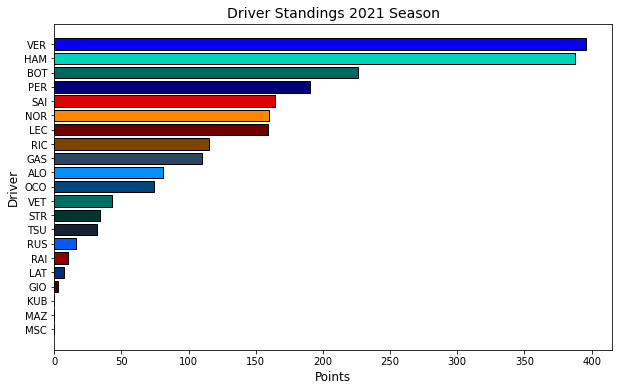

In [26]:
colors=['#0600ef','#00d2be','#00695e','#020077','#dc0000','#ff8700','#6e0000','#7f4300','#2b4562','#0090ff','#00477f','#006f62','#003730','#152231','#005aff','#900000','#002d7f','#480000','#480000','#7f7f7f','#ffffff']
plt.figure(figsize=(10,6))
plt.barh(points['code'],points['points'],color=colors,edgecolor='black')
plt.title('Driver Standings 2021 Season',fontsize=14,)
plt.xlabel('Points',fontsize=12)
plt.ylabel('Driver',fontsize=12)
plt.gca().invert_yaxis()

In [27]:
# Re-ordering column so match the final driver standings
cumpoints = cumpoints[['round', 'name','VER', 'HAM', 'BOT', 'PER', 'SAI', 'NOR', 'LEC', 'RIC', 'GAS',
       'ALO', 'OCO', 'VET', 'STR', 'TSU', 'RUS', 'RAI', 'LAT', 'GIO',
       'MSC', 'KUB', 'MAZ']]

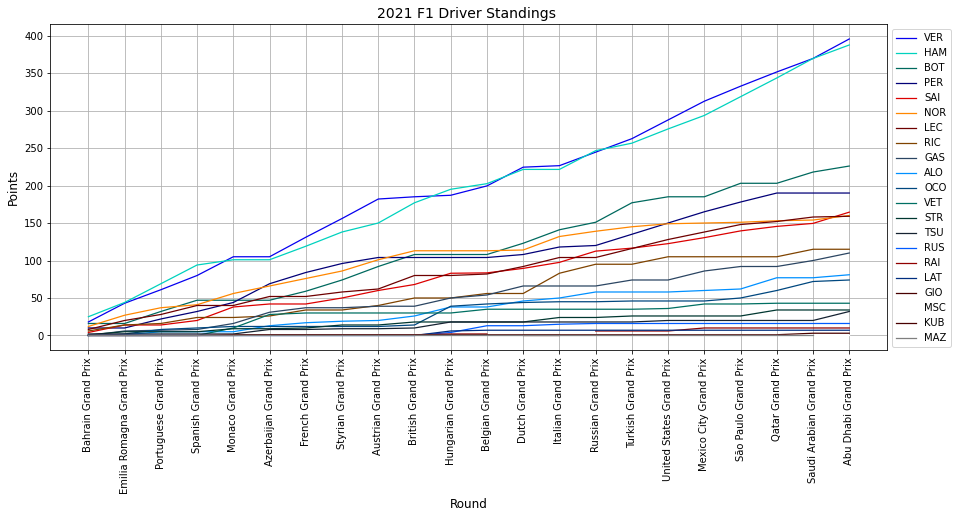

In [171]:
drivers = ['VER', 'HAM', 'BOT', 'PER', 'SAI', 'NOR', 'LEC', 'RIC', 'GAS',
       'ALO', 'OCO', 'VET', 'STR', 'TSU', 'RUS', 'RAI', 'LAT', 'GIO',
       'MSC', 'KUB', 'MAZ']
colors = ['#0600ef','#00d2be','#00695e','#020077','#dc0000',
          '#ff8700','#6e0000','#7f4300','#2b4562','#0090ff',
          '#00477f','#006f62','#003730','#152231','#005aff',
          '#900000','#002d7f','#480000','#ffffff','#480000',
          '#7f7f7f']
plt.figure(figsize=(15,6))

for i,(driver,color) in enumerate(zip(drivers,colors)):
    plt.plot(cumpoints['name'], 
             cumpoints[driver],
             color=colors[i],
             label=drivers[i],
             linewidth=1.25)

plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)

plt.title('2021 F1 Driver Standings ', fontsize=14)
plt.xlabel('Round',fontsize=12)
plt.ylabel('Points',fontsize=12)
plt.legend(bbox_to_anchor=(1,1),fontsize=10)
plt.grid()

plt.show()

## Pole Position

In [205]:
# note: for sprint quali, the winner consider as pole for sunday race (2021 regulation on sprint)
# so number of pole is been taken from starting grid
pole21 = results21.loc[results21.grid == 1][['driverId','grid']]
pole21 = pd.DataFrame(pole21.value_counts()).reset_index()
pole21 = pole21.merge(driver21,on='driverId',how='inner')[['code',0]].rename(columns={0:'pole'})

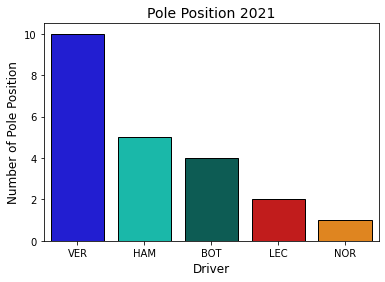

In [209]:
palette = sns.color_palette(['#0600ef','#00d2be','#00695e','#dc0000','#ff8700'])
sns.barplot(x='code',y='pole',data=pole21,palette=palette,edgecolor='black')
plt.ylabel('Number of Pole Position',fontsize=12)
plt.xlabel('Driver',fontsize=12)
plt.title('Pole Position 2021',fontsize=14)
plt.show()

## Race Lead

In [130]:
laps21.loc[laps21['position'] == 1]
leader = laps21.loc[laps21['position'] == 1][['driverId']]

In [172]:
race_leader = pd.DataFrame(leader.value_counts()).reset_index()
race_leader
# pd.merge(driver21['driverId'],race_leader)
race_leader = race_leader.merge(driver21, on='driverId', how='inner')[['code',0]].rename(columns={0:'num_lead'})

Text(0.5, 1.0, 'Race Leader in 2021')

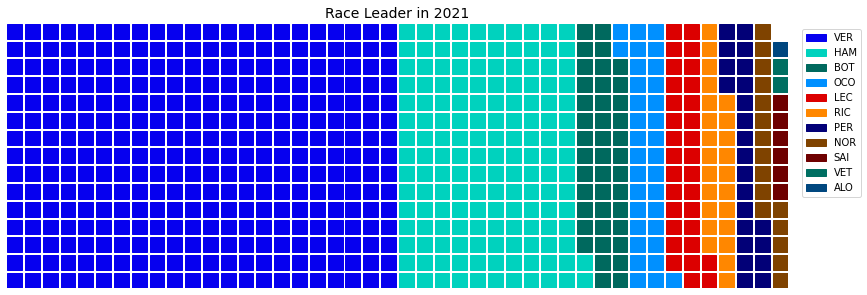

In [173]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=15, 
    values=list(race_leader.num_lead/2),
    labels=list(race_leader.code),
    figsize=(12, 10),
    legend={'bbox_to_anchor': (1.1,1)},
    colors=['#0600ef','#00d2be','#00695e','#0090ff','#dc0000','#ff8700','#020077','#7f4300','#6e0000','#006f62','#00477f'],
)
plt.title('Race Leader in 2021',fontsize=14)

Based on chart above, VER is has lead more lap than other drivers. Followed by HAM, BOT, and so on.

## VER vs HAM (statistics)

In [206]:
ver_quali = quali21.loc[quali21['driverId'] == 830]
ham_quali = quali21.loc[quali21['driverId'] == 1]

ver_race = results21.loc[results21['driverId'] == 830]
ham_race = results21.loc[results21['driverId'] == 1]

ver_laps = laps21.loc[laps21['driverId'] == 830]
ham_laps = laps21.loc[laps21['driverId'] == 1]

ver_pole = len(ver_race.loc[ver_race['grid'] == 1])
ham_pole = len(ham_race.loc[ham_race['grid'] == 1])

ver_win = len(ver_race.loc[ver_race['position'] == 1])
ham_win = len(ham_race.loc[ham_race['position'] == 1])

ver_flap = len(ver_race.loc[((ver_race['position'] >= 1) & (ver_race['position'] <= 10)) & (ver_race['rank'] == 1)])
ham_flap = len(ham_race.loc[((ham_race['position'] >= 1) & (ham_race['position'] <= 10)) & (ham_race['rank'] == 1)])

ver_podium = len(ver_race.loc[(ver_race['position'] >= 1) & (ver_race['position'] <= 3)])
ham_podium = len(ham_race.loc[(ham_race['position'] >= 1) & (ham_race['position'] <= 3)])

ver_top10 = len(ver_race.loc[(ver_race['position'] >= 1) & (ver_race['position'] <= 10)])
ham_top10 = len(ham_race.loc[(ham_race['position'] >= 1) & (ham_race['position'] <= 10)])

ver_led = len(ver_laps.loc[ver_laps['position'] == 1])
ham_led = len(ham_laps.loc[ham_laps['position'] == 1])

ver_dnf = len(ver_race.loc[ver_race['position']==0])
ham_dnf = len(ham_race.loc[ham_race['position']==0])

In [207]:
print('\t\tMax Verstappen\tLewis Hamilton')
print('Pole Position\t{}\t\t{}'.format(ver_pole,ham_pole))
print('Win\t\t{}\t\t{}'.format(ver_win,ham_win))
print('Fastest Lap\t{}\t\t{}'.format(ver_flap,ham_flap))
print('Podium Finish\t{}\t\t{}'.format(ver_podium,ham_podium))
print('Point Finish\t{}\t\t{}'.format(ver_top10,ham_top10))
print('Laps Lead\t{}\t\t{}'.format(ver_led,ham_led))
print('DNF\t\t{}\t\t{}'.format(ver_dnf,ham_dnf))

		Max Verstappen	Lewis Hamilton
Pole Position	10		5
Win		10		8
Fastest Lap	5		6
Podium Finish	18		17
Point Finish	19		20
Laps Lead	660		305
DNF		3		1


In [32]:
d = {
    'stats': ['Pole Position', 'Win', 'Fastest Lap', 'Podium Finish', 'Point Finish', 'Lap Lead', 'DNF'],
    'VER':[ver_pole,ver_win,ver_flap,ver_podium,ver_top10,ver_led,ver_dnf],
    'HAM':[ham_pole,ham_win,ham_flap,ham_podium,ham_top10,ham_led,ham_dnf]
}

stat = pd.DataFrame(d)

stat[['VER','HAM']] = stat[['VER','HAM']].apply(lambda x: x / x.sum(),axis=1)
# stat.insert(0,'stat',stat['stats'].values)


In [95]:
d = {
    'stats': ['Pole Position', 'Win', 'Fastest Lap', 'Podium Finish', 'Point Finish', 'Lap Lead', 'DNF'],
    'VER':[ver_pole,ver_win,ver_flap,ver_podium,ver_top10,ver_led,ver_dnf],
    'HAM':[ham_pole,ham_win,ham_flap,ham_podium,ham_top10,ham_led,ham_dnf]
}

stat = pd.DataFrame(d)

stat[['VER','HAM']] = stat[['VER','HAM']].apply(lambda x: x / x.sum(),axis=1)
stat['HAM'] = stat['HAM'].apply(lambda x: x * -1)
# stat.insert(0,'stat',stat['stats'].values)
stat = pd.melt(stat,id_vars='stats',var_name='driver',value_name='head2head')

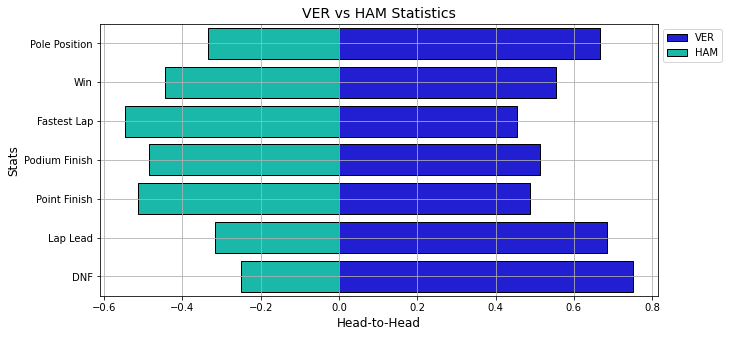

In [98]:
palette = sns.color_palette(['#0600ef','#00d2be'])
plt.figure(figsize=(10,5))
sns.barplot(data=stat, x='head2head',y='stats',
            hue='driver',orient='horizontal', 
            dodge=False,palette=palette,edgecolor='black')
# plt.xticks([])
plt.ylabel('Stats',fontsize=12)
plt.xlabel('Head-to-Head',fontsize=12)
plt.title('VER vs HAM Statistics',fontsize=14)
plt.legend(bbox_to_anchor=(1,1),fontsize=10)
plt.grid()
plt.show()

## Spanish GP

Spanish GP is one of the most exciting race to watch in 2021 Season. Max Verstappen with start in first row alongside with his championship rival, Lewis Hamilton who qualify for pole, managed to overtake him in the first lap in the first corner. But with Hamilton has been favoured all weekend, Verstappen need to perform better in race day. On the other hand, Charles Lecrec start in the second row alongside Valteri Bottas succesfully overtake him on the outside on the turn 3. But neither Verstappen nor Lecrec perform better until the end of the race. Here's some closer look on lap times for Hamilton, Verstappen, Bottas, and Lecrec.

In [34]:
esp_laps = laps21.loc[laps21['raceId'] == 1055] 

ham_esp = esp_laps.loc[esp_laps['driverId'] == 1].reset_index(drop=True)
ver_esp = esp_laps.loc[esp_laps['driverId'] == 830].reset_index(drop=True)
bot_esp = esp_laps.loc[esp_laps['driverId'] == 822].reset_index(drop=True)
lec_esp = esp_laps.loc[esp_laps['driverId'] == 844].reset_index(drop=True)
per_esp = esp_laps.loc[esp_laps['driverId'] == 815].reset_index(drop=True)

In [35]:
esp = esp_laps.pivot(index='lap',columns='driverId',values='seconds').reset_index()[['lap',1,830,822,844,815]]
esp['delta ham'] = esp[1] - esp[822]
esp['gap ham'] = esp['delta ham'].cumsum()
esp['delta ver'] = esp[830] - esp[822]
esp['gap ver'] = esp['delta ver'].cumsum()
esp['delta lec'] = esp[844] - esp[822]
esp['gap lec'] = esp['delta lec'].cumsum()
esp['delta per'] = esp[815] - esp[822]
esp['gap per'] = esp['delta per'].cumsum()

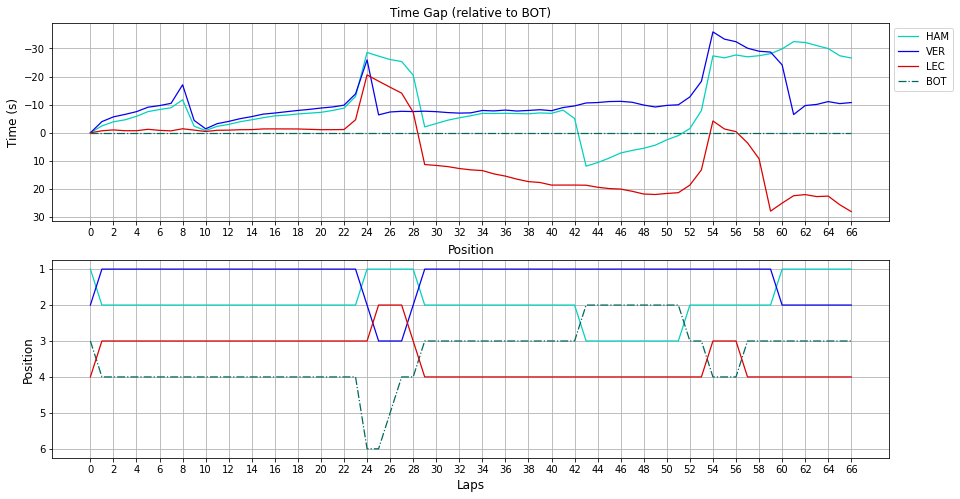

In [36]:
zero = [0]*67

fig, (ax1, ax2) = plt.subplots(2,figsize=(15,8))

ax1.plot(esp['lap'],esp['gap ham'],color='#00d2be',label='HAM',linewidth=1.25)
ax1.plot(esp['lap'],esp['gap ver'],color='#0600ef',label='VER',linewidth=1.25)
ax1.plot(esp['lap'],esp['gap lec'],color='#dc0000',label='LEC',linewidth=1.25)
ax1.plot(esp['lap'],zero,color='#00695e',label='BOT',linewidth=1.25,linestyle='-.')
ax1.invert_yaxis()
ax1.set_title('Time Gap (relative to BOT)',fontsize=12)
ax1.set_ylabel('Time (s)',fontsize=12)
ax1.set_xticks(np.arange(0,67,2))
ax1.legend(bbox_to_anchor=(1,1),fontsize=10)
ax1.grid()

ax2.plot(bot_esp['lap'],ham_esp['position'],color='#00d2be',label='HAM',linewidth=1.25)
ax2.plot(bot_esp['lap'],ver_esp['position'],color='#0600ef',label='VER',linewidth=1.25)
ax2.plot(bot_esp['lap'],bot_esp['position'],color='#00695e',label='BOT',linewidth=1.25,linestyle='-.')
ax2.plot(bot_esp['lap'],lec_esp['position'],color='#dc0000',label='LEC',linewidth=1.25)
ax2.invert_yaxis()
ax2.set_yticks([1,2,3,4,5,6])
ax2.set_xticks(np.arange(1,67,5))
ax2.set_title('Position',fontsize=12)
ax2.set_ylabel('Position',fontsize=12)
ax2.set_xlabel('Laps',fontsize=12)
ax2.set_xticks(np.arange(0,67,2))
ax2.grid()

plt.show()

Key moment in 2021 Spanish Grand Prix:
- On lap 8 Safety Car out because of Tsunoda has problem on his car. All drivers slow down and no overtaking.
- Lap 10 Safety Car in and race begin.
- Hamilton has similar pace with Verstappen, but cannot overtkae him in the first stint. 
- Lecrec has similar pace with Bottas and managed to keep him at his tail for the first stint.
- Verstappen pits in lap 23, try to overcut Hamilton. Hamilton out for several laps.
- Hamilton pits in lap 29 and has better out lap managed to get close to Verstappen.
- Bottas pits in lap 23 try to undercut Lecrec. His time really improving on the second stint.
- Lecrec pits in lap 27 and been overtake by Bottas while pitting. Bottas undercut is succesful
- Lecrec time in second stint is worst than his first.
- Verstappen did not really improve after pit stop. Hamilton still can't managed to overtake him.
- Hamilton pit once again in lap 43 and his time is improving.
- Hamilton finally overtake Verstappen in lap 59. Vertspeen has free pit stop, try to pit for the last time to steal fastest lap from Hamilton. 
- Verstappen time really improving after his final pit.

In [37]:
dum = esp_laps.pivot(index='lap',columns='driverId',values='seconds').reset_index()[['lap',1,830,822]]
dum['delta ham'] = dum[1] - dum[830]
dum['gap ham'] = dum['delta ham'].cumsum()
dum['delta bot'] = dum[822] - dum[830]
dum['gap bot'] = dum['delta bot'].cumsum()

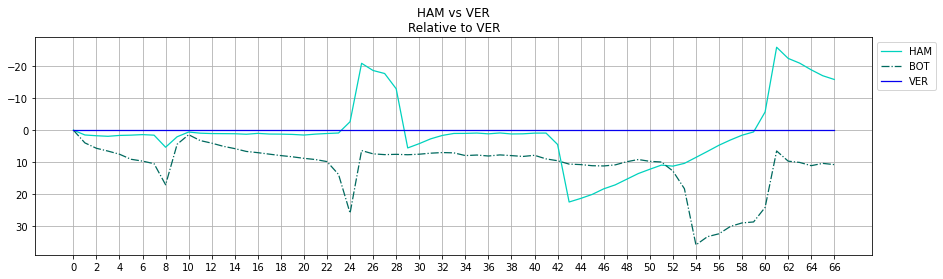

In [38]:
zero = [0]*67
plt.figure(figsize=(15,4))
plt.plot(dum['lap'],dum['gap ham'],color='#00d2be',label='HAM',linewidth=1.25)
plt.plot(dum['lap'],dum['gap bot'],color='#00695e',label='BOT',linewidth=1.25,linestyle='-.')
plt.plot(dum['lap'],zero,color='#0600ef',label='VER',linewidth=1.25)
plt.gca().invert_yaxis()
plt.xticks(np.arange(0,67,2))
# plt.suptitle('HAM vs VER')
plt.title('HAM vs VER\nRelative to VER')
plt.grid()
plt.legend(bbox_to_anchor=(1,1),fontsize=10)
plt.show()

## Monaco GP

Monaco GP is the most prestigous race in the calendar. This year, the Monaco GP deliver on of the most exciting race of all season. Charles Lecrec managed to get the fastest time on first flying lap at Q3, giving hope that he will starting from pole at his home crowd. But the table has been turn. At the end of Q3 he crash at swimming pool chicane means the season will not restarted. He secured his pole but the car cannot start the race since there's problem in his gearbox shaft.

Max Verstappen started at P2 and his championship rival,Lewis Hamilton, started P7 giving him a chance to gain more points at this grand prix. The narrow circuit makes its hard to overtake. The Teams need to give driver the best strategy to gain more advantage against their rival. Here are some key moments from 2021 Monaco GP.

In [39]:
mon_laps = laps21.loc[laps21['raceId'] == 1056] 

ham_mon = mon_laps.loc[mon_laps['driverId'] == 1].reset_index(drop=True)
gas_mon = mon_laps.loc[mon_laps['driverId'] == 842].reset_index(drop=True)
vet_mon = mon_laps.loc[mon_laps['driverId'] == 20].reset_index(drop=True)
per_mon = mon_laps.loc[mon_laps['driverId'] == 815].reset_index(drop=True)
nor_mon = mon_laps.loc[mon_laps['driverId'] == 846].reset_index(drop=True)
ver_mon = mon_laps.loc[mon_laps['driverId'] == 830].reset_index(drop=True)
sai_mon = mon_laps.loc[mon_laps['driverId'] == 832].reset_index(drop=True)

In [217]:
mon = mon_laps.pivot(index='lap',columns='driverId',values='seconds').reset_index()[['lap',830,832,846,815,20,842,1]]
mon['delta ver'] = mon[830] - mon[815]
mon['gap ver'] = mon['delta ver'].cumsum()
mon['delta sai'] = mon[832] - mon[815]
mon['gap sai'] = mon['delta sai'].cumsum()
mon['delta nor'] = mon[846] - mon[815]
mon['gap nor'] = mon['delta nor'].cumsum()
mon['delta vet'] = mon[20] - mon[815]
mon['gap vet'] = mon['delta vet'].cumsum()
mon['delta gas'] = mon[842] - mon[815]
mon['gap gas'] = mon['delta gas'].cumsum()
mon['delta ham'] = mon[1] - mon[815]
mon['gap ham'] = mon['delta ham'].cumsum()

gas = mon_laps.pivot(index='lap',columns='driverId',values='seconds').reset_index()[['lap',830,832,846,815,20,842,1]]
gas['delta gas'] = gas[842] - gas[830]
gas['gap gas'] = gas['delta gas'].cumsum()
gas['delta sai'] = gas[832] - gas[830]
gas['gap sai'] = gas['delta sai'].cumsum()
gas['delta nor'] = gas[846] - gas[830]
gas['gap nor'] = gas['delta nor'].cumsum()
gas['delta per'] = gas[815] - gas[830]
gas['gap per'] = gas['delta per'].cumsum()
gas['delta vet'] = gas[20] - gas[830]
gas['gap vet'] = gas['delta vet'].cumsum()
gas['delta ham'] = gas[1] - gas[830]
gas['gap ham'] = gas['delta ham'].cumsum()

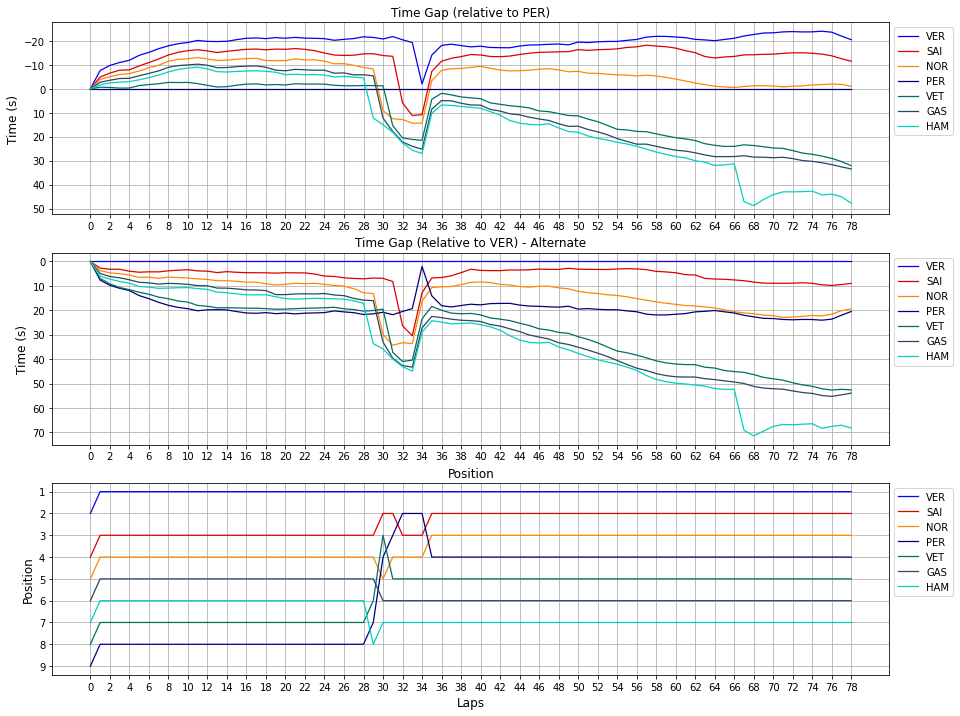

In [218]:
zero = [0]*79

fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(15,12))

ax1.plot(mon['lap'],mon['gap ver'],color='#0600ef',label='VER',linewidth=1.25)
ax1.plot(mon['lap'],mon['gap sai'],color='#dc0000',label='SAI',linewidth=1.25)
ax1.plot(mon['lap'],mon['gap nor'],color='#ff8700',label='NOR',linewidth=1.25)
ax1.plot(mon['lap'],zero, color='#020077',label='PER',linewidth=1.25)
ax1.plot(mon['lap'],mon['gap vet'],color='#006f62',label='VET',linewidth=1.25)
ax1.plot(mon['lap'],mon['gap gas'],color='#2b4562',label='GAS',linewidth=1.25)
ax1.plot(mon['lap'],mon['gap ham'],color='#00d2be',label='HAM',linewidth=1.25)
ax1.invert_yaxis()
ax1.set_title('Time Gap (relative to PER)',fontsize=12)
ax1.set_ylabel('Time (s)',fontsize=12)
ax1.set_xticks(np.arange(0,80,2))
ax1.grid()
ax1.legend(bbox_to_anchor=(1,1),fontsize=10)

ax2.plot(gas['lap'],zero,color='#0600ef',label='VER',linewidth=1.25)
ax2.plot(gas['lap'],gas['gap sai'],color='#dc0000',label='SAI',linewidth=1.25)
ax2.plot(gas['lap'],gas['gap nor'],color='#ff8700',label='NOR',linewidth=1.25)
ax2.plot(gas['lap'],gas['gap per'],color='#020077',label='PER',linewidth=1.25)
ax2.plot(gas['lap'],gas['gap vet'],color='#006f62',label='VET',linewidth=1.25)
ax2.plot(gas['lap'],gas['gap gas'],color='#2b4562',label='GAS',linewidth=1.25)
ax2.plot(gas['lap'],gas['gap ham'],color='#00d2be',label='HAM',linewidth=1.25)
ax2.invert_yaxis()
ax2.set_xticks(np.arange(0,80,2))
ax2.set_title('Time Gap (Relative to VER) - Alternate',fontsize=12)
ax2.set_ylabel('Time (s)',fontsize=12)
ax2.grid()
ax2.legend(bbox_to_anchor=(1,1),fontsize=10)

ax3.plot(nor_mon['lap'],ver_mon['position'],color='#0600ef',label='VER',linewidth=1.25)
ax3.plot(nor_mon['lap'],sai_mon['position'],color='#dc0000',label='SAI',linewidth=1.25)
ax3.plot(nor_mon['lap'],nor_mon['position'],color='#ff8700',label='NOR',linewidth=1.25)
ax3.plot(nor_mon['lap'],per_mon['position'],color='#020077',label='PER',linewidth=1.25)
ax3.plot(nor_mon['lap'],vet_mon['position'],color='#006f62',label='VET',linewidth=1.25)
ax3.plot(nor_mon['lap'],gas_mon['position'],color='#2b4562',label='GAS',linewidth=1.25)
ax3.plot(nor_mon['lap'],ham_mon['position'],color='#00d2be',label='HAM',linewidth=1.25)
ax3.invert_yaxis()
ax3.set_yticks([1,2,3,4,5,6,7,8,9])
ax3.set_xticks(np.arange(1,67,5))
ax3.set_title('Position',fontsize=12)
ax3.set_ylabel('Position',fontsize=12)
ax3.set_xlabel('Laps',fontsize=12)
ax3.set_xticks(np.arange(0,80,2))
ax3.grid()
ax3.legend(bbox_to_anchor=(1,1),fontsize=10)

plt.show()

Key moment in 2021 Spanish Grand Prix:
- all driver gain 1 position since Lecrec is DNS.
- from these selected driver, nothing really happening in terms of lap times.
- Hamilton pits at lap 29, Gasly pits one lap after and still manage come out in front of Hamilton.
- Vettel pits at lap 31. Before that he increase his pace since he get clean air, no car in front of him. He managed jumped Hamilton and Gasly.
- Perez pits very late, at lap 35. He really in best position and get clean air since Norris and Sainz is already pit. He managed jumped Hamilton, Gasly and Vettel.
- Verstappen time in second stint is pretty fast. Sainz try to compete but didnt get enough time since he get pressure from Norris behind.
- Norris is attacking against Norris but he also get pressure from Perez who really fast near last quarter of the race. 
- Perez managed to get close Norris but didnt have enough time.
- Hamilton pit to change to soft tyre since he got free pit stop. He managed to get fastest lap.

## French GP

In [44]:
fre_laps = laps21.loc[laps21['raceId']==1059]

ver_fre = fre_laps.loc[fre_laps['driverId'] == 830].reset_index(drop=True)
ham_fre = fre_laps.loc[fre_laps['driverId'] == 1].reset_index(drop=True)
per_fre = fre_laps.loc[fre_laps['driverId'] == 815].reset_index(drop=True)
bot_fre = fre_laps.loc[fre_laps['driverId'] == 822].reset_index(drop=True)

In [45]:
fre = fre_laps.pivot(index='lap',columns='driverId',values='seconds').reset_index()[['lap',830,1,815,822]]
fre['delta ver'] =fre[830] - fre[822]
fre['gap ver'] = fre['delta ver'].cumsum()
fre['delta ham'] = fre[1] - fre[822]
fre['gap ham'] = fre['delta ham'].cumsum()
fre['delta per'] = fre[815] - fre[822]
fre['gap per'] = fre['delta per'].cumsum()

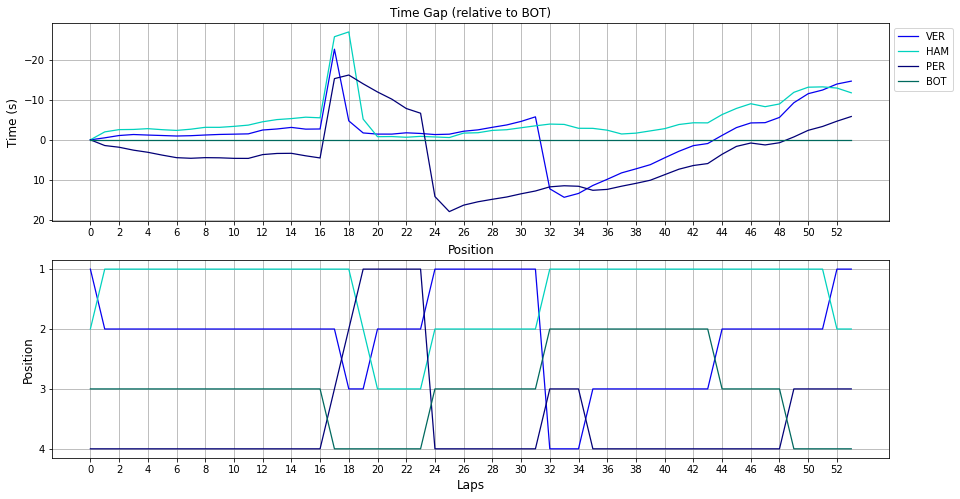

In [46]:
zero = [0]*54

fig, (ax1, ax2) = plt.subplots(2,figsize=(15,8))

ax1.plot(fre['lap'],fre['gap ver'],color='#0600ef',label='VER',linewidth=1.25)
ax1.plot(fre['lap'],fre['gap ham'],color='#00d2be',label='HAM',linewidth=1.25)
ax1.plot(fre['lap'],fre['gap per'],color='#020077',label='PER',linewidth=1.25)
ax1.plot(fre['lap'],zero,color='#00695e',label='BOT',linewidth=1.25)
ax1.invert_yaxis()
ax1.set_title('Time Gap (relative to BOT)',fontsize=12)
ax1.set_ylabel('Time (s)',fontsize=12)
ax1.set_xticks(np.arange(0,54,2))

ax2.plot(ver_fre['lap'],ver_fre['position'],color='#0600ef',label='VER',linewidth=1.25)
ax2.plot(ham_fre['lap'],ham_fre['position'],color='#00d2be',label='HAM',linewidth=1.25)
ax2.plot(per_fre['lap'],per_fre['position'],color='#020077',label='PER',linewidth=1.25)
ax2.plot(bot_fre['lap'],bot_fre['position'],color='#00695e',label='BOT',linewidth=1.25)

ax2.invert_yaxis()
ax2.set_yticks([1,2,3,4])
ax2.set_title('Position',fontsize=12)
ax2.set_ylabel('Position',fontsize=12)
ax2.set_xlabel('Laps',fontsize=12)
ax2.set_xticks(np.arange(0,54,2))

# fig.suptitle('GAS vs HAM vs VET vs PER',fontsize=14,x=0.51,y=0.95)
ax1.grid()
ax2.grid()
ax1.legend(bbox_to_anchor=(1,1),fontsize=10)
plt.show()

## Hungary GP

In [47]:
hun_laps = laps21.loc[laps21['raceId'] == 1062]

oco_hun = hun_laps.loc[hun_laps['driverId'] == 839].reset_index(drop=True)
vet_hun = hun_laps.loc[hun_laps['driverId'] == 20].reset_index(drop=True)
ham_hun = hun_laps.loc[hun_laps['driverId'] == 1].reset_index(drop=True)
alo_hun = hun_laps.loc[hun_laps['driverId'] == 4].reset_index(drop=True)

In [48]:
hun = hun_laps.pivot(index='lap',columns='driverId',values='seconds').reset_index()[['lap',839,20,1,4]]
hun['delta oco'] = hun[839] - hun[4]
hun['gap oco'] = hun['delta oco'].cumsum()
hun['delta vet'] = hun[20] - hun[4]
hun['gap vet'] = hun['delta vet'].cumsum()
hun['delta ham'] = hun[1] - hun[4]
hun['gap ham'] = hun['delta ham'].cumsum()

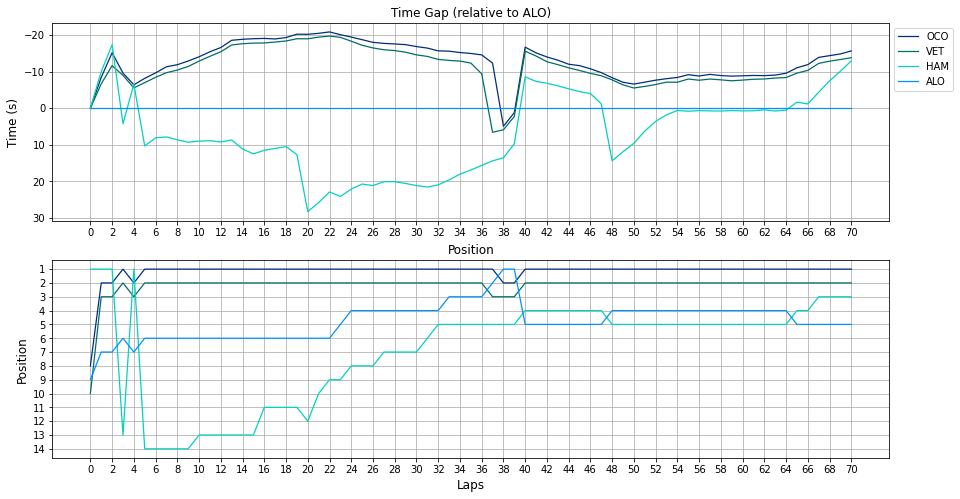

In [49]:
zero = [0]*71

fig, (ax1, ax2) = plt.subplots(2,figsize=(15,8))

ax1.plot(hun['lap'],hun['gap oco'],color='#002d7f',label='OCO',linewidth=1.25)
ax1.plot(hun['lap'],hun['gap vet'],color='#006f62',label='VET',linewidth=1.25)
ax1.plot(hun['lap'],hun['gap ham'],color='#00d2be',label='HAM',linewidth=1.25)
ax1.plot(hun['lap'],zero,color='#0090ff',label='ALO',linewidth=1.25)
ax1.invert_yaxis()
ax1.set_title('Time Gap (relative to ALO)',fontsize=12)
ax1.set_ylabel('Time (s)',fontsize=12)
ax1.set_xticks(np.arange(0,71,2))

ax2.plot(oco_hun['lap'],oco_hun['position'],color='#002d7f',label='OCO',linewidth=1.25)
ax2.plot(vet_hun['lap'],vet_hun['position'],color='#006f62',label='VET',linewidth=1.25)
ax2.plot(ham_hun['lap'],ham_hun['position'],color='#00d2be',label='HAM',linewidth=1.25)
ax2.plot(alo_hun['lap'],alo_hun['position'],color='#0090ff',label='ALO',linewidth=1.25)

ax2.invert_yaxis()
ax2.set_yticks(np.arange(1,15))
ax2.set_title('Position',fontsize=12)
ax2.set_ylabel('Position',fontsize=12)
ax2.set_xlabel('Laps',fontsize=12)
ax2.set_xticks(np.arange(0,71,2))

# fig.suptitle('GAS vs HAM vs VET vs PER',fontsize=14,x=0.51,y=0.95)
ax1.grid()
ax2.grid()
ax1.legend(bbox_to_anchor=(1,1),fontsize=10)
plt.show()

In [50]:
oco = hun_laps.pivot(index='lap',columns='driverId',values='seconds').reset_index()[['lap',839,20]]
oco['delta vet'] = oco[20] - oco[839]
oco['gap vet'] = oco['delta vet'].cumsum()

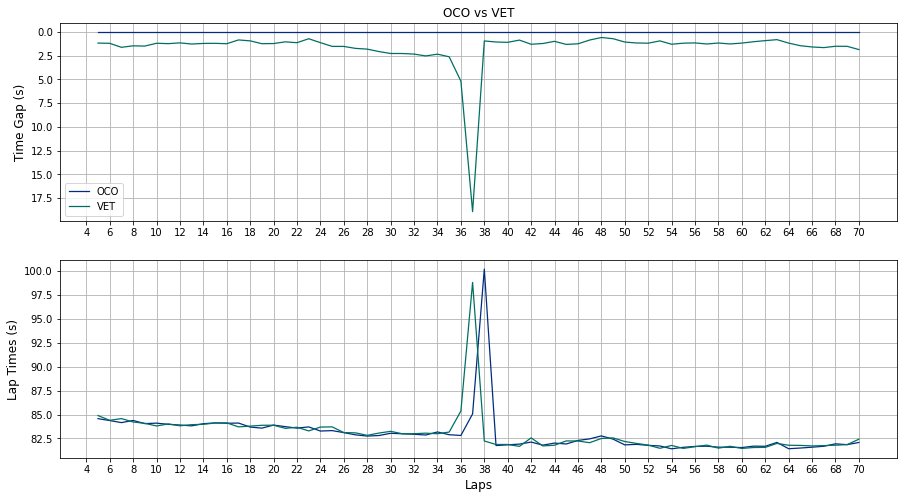

In [52]:
# Closer Look of OCO vs VET Lap Times Gap

zero = [0]*66
fig, (ax1, ax2) = plt.subplots(2,figsize=(15,8))

ax1.plot(oco['lap'][5:71],zero,color='#002d7f',label='OCO',linewidth=1.25)
ax1.plot(oco['lap'][5:71],oco['gap vet'][5:71],color='#006f62',label='VET',linewidth=1.25)
ax1.invert_yaxis()
ax1.set_title('OCO vs VET',fontsize=12)
ax1.set_ylabel('Time Gap (s)',fontsize=12)
ax1.set_xticks(np.arange(4,71,2))
ax1.legend()
ax1.grid()

ax2.plot(oco_hun.iloc[5:,2],oco_hun.iloc[5:,6],color='#002d7f',label='OCO',linewidth=1.25)
ax2.plot(vet_hun.iloc[5:,2],vet_hun.iloc[5:,6],color='#006f62',label='VET',linewidth=1.25)
ax2.set_xticks(np.arange(4,71,2))
ax2.set_xlabel('Laps',fontsize=12)
ax2.set_ylabel('Lap Times (s)',fontsize=12)
ax2.grid()

plt.show()

In [53]:
alo = hun_laps.pivot(index='lap',columns='driverId',values='seconds').reset_index()[['lap',4,1]]
alo['delta ham'] = alo[1] - alo[4]
alo['gap ham'] = alo['delta ham'].cumsum()

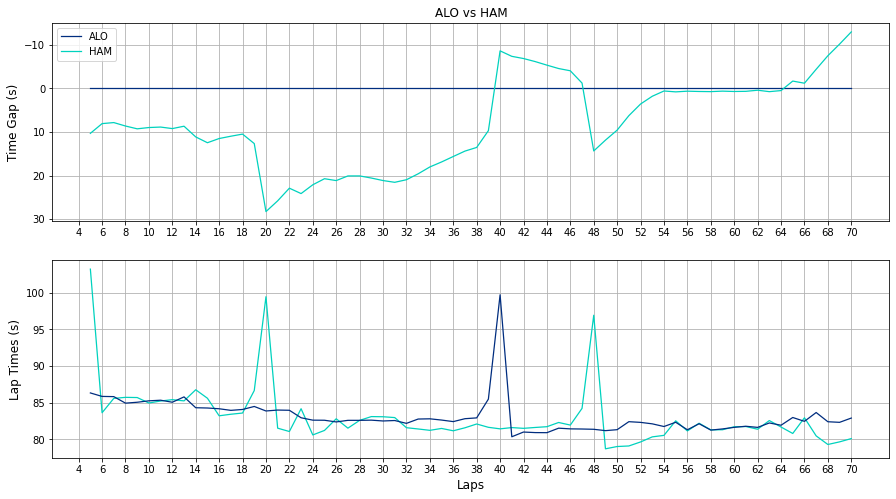

In [54]:
# Closer Look of ALO vs HAM Lap Times Gap

zero = [0]*66
fig, (ax1, ax2) = plt.subplots(2,figsize=(15,8))

ax1.plot(alo['lap'][5:71],zero,color='#002d7f',label='ALO',linewidth=1.25)
ax1.plot(alo['lap'][5:71],alo['gap ham'][5:71],color='#00d2be',label='HAM',linewidth=1.25)
ax1.invert_yaxis()
ax1.set_title('ALO vs HAM',fontsize=12)
ax1.set_ylabel('Time Gap (s)',fontsize=12)
ax1.set_xticks(np.arange(4,71,2))
ax1.legend()
ax1.grid()

ax2.plot(ham_hun.iloc[5:,2],ham_hun.iloc[5:,6],color='#00d2be',label='HAM',linewidth=1.25)
ax2.plot(alo_hun.iloc[5:,2],alo_hun.iloc[5:,6],color='#002d7f',label='ALO',linewidth=1.25)
ax2.set_xticks(np.arange(4,71,2))
ax2.set_xlabel('Laps',fontsize=12)
ax2.set_ylabel('Lap Times (s)',fontsize=12)
ax2.grid()

plt.show()